In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    x = np.cumsum(x[:-1] * dt)
    y = t[1:]
    return [a/b for a,b in zip(x,y)]

def filter_vec(df, name):
    x = df[(df.name == name + ":vector") & (df.type == "vector")] #.filter(["vectime","vecvalue"])
    return x #pd.DataFrame(index=x.vectime.values[0], data={name : x.vecvalue.values[0]})

## Caso DC - Recursos

In [3]:
# Cargamos los datos
targetDcRes = pd.read_csv("targetDcRes.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Sacamos solo los vectores
proc = targetDcRes[targetDcRes.type == "vector"]
proc

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
1600,targetDc-0-20240613-07:46:32-6431,vector,SimpleFogNetwork.dc.resourceManager,allocatedVms:vector,NaN,None,NaN,[113.178218007921],[1.0]
1603,targetDc-0-20240613-07:46:32-6431,vector,SimpleFogNetwork.dc.resourceManager,allocatedCores:vector,NaN,None,NaN,[113.178218007921],[1.0]
1606,targetDc-0-20240613-07:46:32-6431,vector,SimpleFogNetwork.dc.resourceManager,allocatedRam:vector,NaN,None,NaN,[113.178218007921],[2.0]
1610,targetDc-0-20240613-07:46:32-6431,vector,SimpleFogNetwork.dc.resourceManager,allocatedDisk:vector,NaN,None,NaN,[113.178218007921],[250.0]
1614,targetDc-10-20240613-07:46:43-6431,vector,SimpleFogNetwork.dc.resourceManager,allocatedVms:vector,NaN,None,NaN,[115.512450737044],[1.0]
...,...,...,...,...,...,...,...,...,...
1932,targetDc-8-20240613-07:46:41-6431,vector,SimpleFogNetwork.dc.resourceManager,allocatedDisk:vector,NaN,None,NaN,[114.527904664197],[250.0]
1936,targetDc-9-20240613-07:46:42-6431,vector,SimpleFogNetwork.dc.resourceManager,allocatedVms:vector,NaN,None,NaN,[116.950575159846],[1.0]
1939,targetDc-9-20240613-07:46:42-6431,vector,SimpleFogNetwork.dc.resourceManager,allocatedCores:vector,NaN,None,NaN,[116.950575159846],[1.0]
1942,targetDc-9-20240613-07:46:42-6431,vector,SimpleFogNetwork.dc.resourceManager,allocatedRam:vector,NaN,None,NaN,[116.950575159846],[2.0]


In [20]:
def merge_data(df, data_name: str):
    # Empezamos el proceso de merging del conjunto de datos
    row = vec.iloc[0]
    mean_res = pd.DataFrame(index=row.vectime, data={data_name : row.vecvalue})

    for i in range(1,len(vec)):
        row = vec.iloc[i]
        row = pd.DataFrame(index=row.vectime, data={data_name : row.vecvalue})
        mean_res = pd.concat((mean_res, row))
        
    mean_res = mean_res_dc.groupby(level=0).mean()
    return mean_res

In [22]:
res_dc = dict()
res_dc["vms"] = merge_data(filter_vec(targetDcRes, "allocatedVms"), "vms")
res_dc["ram"] = merge_data(filter_vec(targetDcRes, "allocatedRam"), "ram")
res_dc["disk"] = merge_data(filter_vec(targetDcRes, "allocatedDisk"), "disk")
res_dc["cpus"] = merge_data(filter_vec(targetDcRes, "allocatedCpus"), "cpus")

## Gráficas

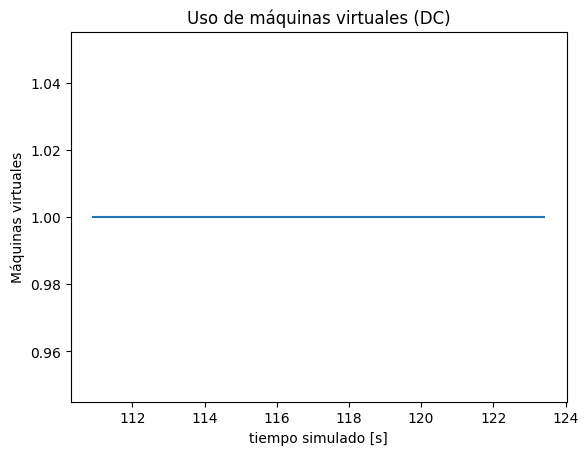

In [25]:
plt.title("Uso de máquinas virtuales (DC)")
plt.ylabel("Máquinas virtuales")
plt.xlabel("tiempo simulado [s]")
plt.plot(res_dc["vms"])
plt.show()

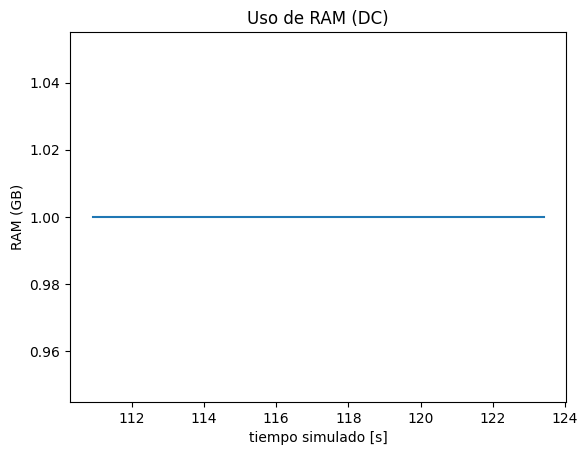

In [26]:
plt.title("Uso de RAM (DC)")
plt.ylabel("RAM (GB)")
plt.xlabel("tiempo simulado [s]")
plt.plot(res_dc["ram"])
plt.show()

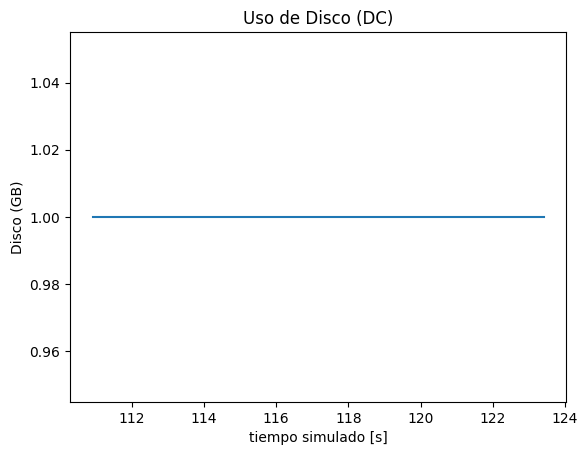

In [27]:
plt.title("Uso de Disco (DC)")
plt.ylabel("Disco (GB)")
plt.xlabel("tiempo simulado [s]")

#plt.xlim(0,3600)
plt.plot(res_dc["disk"])
plt.show()

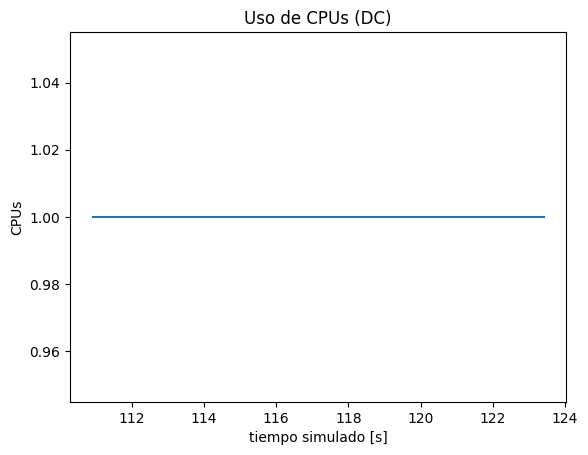

In [29]:
plt.title("Uso de CPUs (DC)")
plt.ylabel("CPUs")
plt.xlabel("tiempo simulado [s]")

#plt.xlim(0,3600)
plt.plot(res_dc["cpus"])
plt.show()

## Caso Fog - Recursos

In [32]:
# Cargamos los datos
targetDcFog = pd.read_csv("targetFogRes.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Sacamos solo los vectores
proc = targetDcFog[targetDcFog.type == "vector"]
proc

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
1600,targetFog-0-20240613-07:45:14-6129,vector,SimpleFogNetwork.fg.resourceManager,allocatedVms:vector,NaN,None,NaN,[112.981110385129],[1.0]
1603,targetFog-0-20240613-07:45:14-6129,vector,SimpleFogNetwork.fg.resourceManager,allocatedCores:vector,NaN,None,NaN,[112.981110385129],[1.0]
1606,targetFog-0-20240613-07:45:14-6129,vector,SimpleFogNetwork.fg.resourceManager,allocatedRam:vector,NaN,None,NaN,[112.981110385129],[2.0]
1610,targetFog-0-20240613-07:45:14-6129,vector,SimpleFogNetwork.fg.resourceManager,allocatedDisk:vector,NaN,None,NaN,[112.981110385129],[250.0]
1614,targetFog-10-20240613-07:45:25-6129,vector,SimpleFogNetwork.fg.resourceManager,allocatedVms:vector,NaN,None,NaN,[112.340578034823],[1.0]
...,...,...,...,...,...,...,...,...,...
1932,targetFog-8-20240613-07:45:22-6129,vector,SimpleFogNetwork.fg.resourceManager,allocatedDisk:vector,NaN,None,NaN,[114.375518409253],[250.0]
1936,targetFog-9-20240613-07:45:24-6129,vector,SimpleFogNetwork.fg.resourceManager,allocatedVms:vector,NaN,None,NaN,[116.789335668099],[1.0]
1939,targetFog-9-20240613-07:45:24-6129,vector,SimpleFogNetwork.fg.resourceManager,allocatedCores:vector,NaN,None,NaN,[116.789335668099],[1.0]
1942,targetFog-9-20240613-07:45:24-6129,vector,SimpleFogNetwork.fg.resourceManager,allocatedRam:vector,NaN,None,NaN,[116.789335668099],[2.0]


In [33]:
res_fog = dict()
res_fog["vms"] = merge_data(filter_vec(targetDcFog, "allocatedVms"), "vms")
res_fog["ram"] = merge_data(filter_vec(targetDcFog, "allocatedRam"), "ram")
res_fog["disk"] = merge_data(filter_vec(targetDcFog, "allocatedDisk"), "disk")
res_fog["cpus"] = merge_data(filter_vec(targetDcFog, "allocatedCpus"), "cpus")

## Gráficas

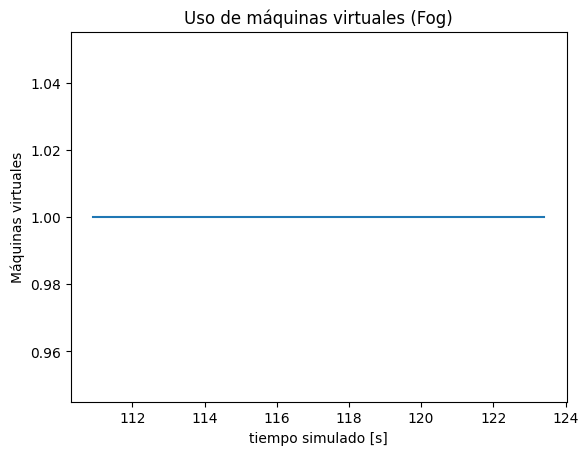

In [36]:
plt.title("Uso de máquinas virtuales (Fog)")
plt.ylabel("Máquinas virtuales")
plt.xlabel("tiempo simulado [s]")
plt.plot(res_fog["vms"])
plt.show()

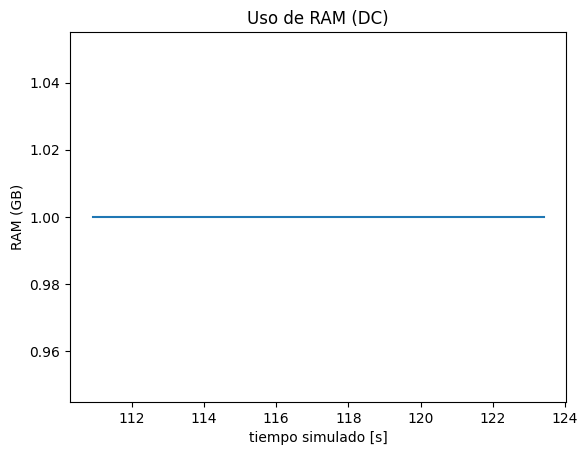

In [37]:
plt.title("Uso de RAM (DC)")
plt.ylabel("RAM (GB)")
plt.xlabel("tiempo simulado [s]")
plt.plot(res_fog["ram"])
plt.show()

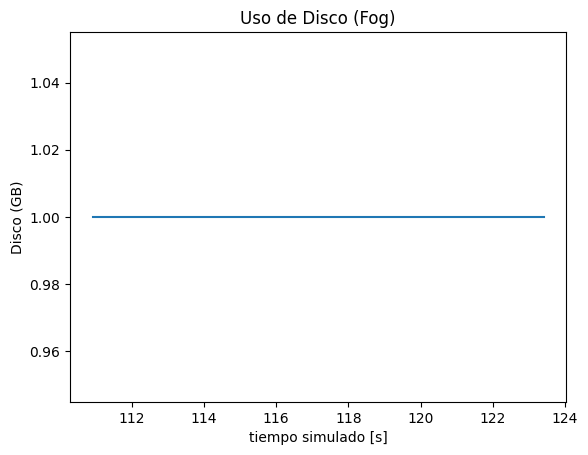

In [38]:
plt.title("Uso de Disco (Fog)")
plt.ylabel("Disco (GB)")
plt.xlabel("tiempo simulado [s]")

#plt.xlim(0,3600)
plt.plot(res_fog["disk"])
plt.show()

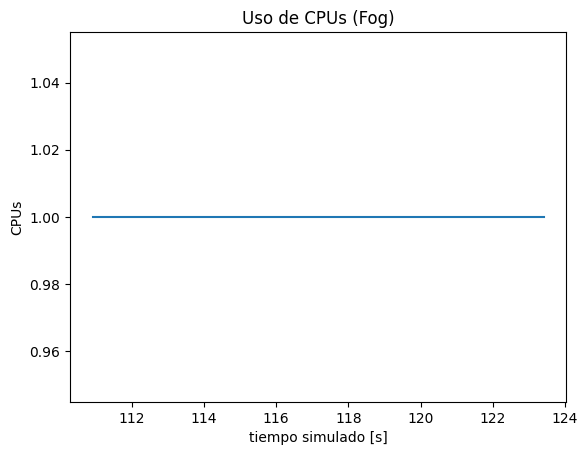

In [39]:
plt.title("Uso de CPUs (Fog)")
plt.ylabel("CPUs")
plt.xlabel("tiempo simulado [s]")

#plt.xlim(0,3600)
plt.plot(res_fog["cpus"])
plt.show()